In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
%matplotlib inline

In [2]:
import pandas as pd
import pygwalker as pyg

In [3]:
# load the data using pandas 
data = pd.read_csv('D:/newai/Data Analysis Project/AI-ML Youtube Videos/AI_ML_YT_Videos.csv')

In [5]:
data.head()

,Unnamed: 0,Channel,Title,PublishedDate,Views,Likes,Comments
0,0,Jeff Heaton,LSTM-Based Time Series with PyTorch (10.2),2023-10-27,764,45,1
1,1,Jeff Heaton,"Time Series Data Encoding for Deep Learning, P...",2023-10-26,530,31,1
2,2,Jeff Heaton,Bayesian Hyperparameter Optimization for PyTor...,2023-10-25,453,29,1
3,3,Jeff Heaton,Creating Certificates to Deploy PyInstaller Py...,2023-10-17,439,12,0
4,4,Jeff Heaton,How Should you Architect Your PyTorch Neural N...,2023-10-12,825,39,1


In [6]:
data.shape

(6151, 7)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6151 entries, 0 to 6150
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Unnamed: 0     6151 non-null   int64 
 1   Channel        6151 non-null   object
 2   Title          6151 non-null   object
 3   PublishedDate  6151 non-null   object
 4   Views          6151 non-null   int64 
 5   Likes          6151 non-null   int64 
 6   Comments       6151 non-null   int64 
dtypes: int64(4), object(3)
memory usage: 336.5+ KB


# Cleaning data

In [8]:
# drop column Unnamed: 0 has not values important
data.drop(columns=['Unnamed: 0'], axis=1, inplace=True)

In [9]:
# convert data type for column PublishedDate from object to datetime
data['PublishedDate'] = pd.to_datetime(data['PublishedDate'])

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6151 entries, 0 to 6150
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Channel        6151 non-null   object        
 1   Title          6151 non-null   object        
 2   PublishedDate  6151 non-null   datetime64[ns]
 3   Views          6151 non-null   int64         
 4   Likes          6151 non-null   int64         
 5   Comments       6151 non-null   int64         
dtypes: datetime64[ns](1), int64(3), object(2)
memory usage: 288.5+ KB


In [11]:
data.isna().sum()

Channel          0
Title            0
PublishedDate    0
Views            0
Likes            0
Comments         0
dtype: int64

In [12]:
# Checking the duplicates values in the data
data.duplicated().sum()

0

In [13]:
# Some basics statistics analysis
data.describe().style.background_gradient(cmap='ocean')

,PublishedDate,Views,Likes,Comments
count,6151,6151.000000,6151.000000,6151.000000
mean,2019-02-18 20:37:43.827019776,52208.953016,935.637132,72.171029
min,2006-10-25 00:00:00,0.000000,0.000000,0.000000
25%,2017-07-07 00:00:00,5017.500000,83.000000,7.000000
50%,2019-09-08 00:00:00,16606.000000,313.000000,27.000000
75%,2021-05-27 00:00:00,52116.500000,926.000000,80.000000
max,2023-10-27 00:00:00,2689040.000000,64750.000000,3478.000000
std,nan,118031.753789,2243.596155,144.250349


In [14]:
data.nunique()

Channel            12
Title            6113
PublishedDate    2621
Views            5785
Likes            2061
Comments          493
dtype: int64

# Explore data analysis

### Questions asked from the data

* identify and datetime the youtube channel renowned for educational   content on Ai or Ds.
* identify the most frequently occurring concepts in videos and list the top 10 with the highest repetition.
* identify and analyze the available options or feature related to views in the datasets.
* compile a list of the top 10 youtube channels along with their respective views based on the datasets.

In [15]:
data['Channel'].unique()

array(['Jeff Heaton', 'Arxiv Insights', 'Daniel Bourke',
       'Artificial Intelligence — All in One', 'Siraj Raval',
       'Nicholas Renotte', 'Jeremy Howard', 'Applied AI Course',
       'DeepLearning.TV', 'DeepLearningAI', 'Sentdex', 'Krish Naik'],
      dtype=object)

In [16]:
data['Channel'].value_counts().sort_values(ascending=False).plot(kind='bar', figsize=(10,8));
plt.title('most popular youtubr channels for Ai courses')
plt.xlabel('Channel names')
plt.ylabel('values');

In [17]:
# most popular topics and repeted topics in the youtube channels
pd.DataFrame(data['Title'].value_counts().head(10))

,count
Title,
Live Q&A Data Science,5
Kaggle Challenge (LIVE),3
Live Q&A- Ask Anything Related Data Science,3
Quantum Machine Learning (LIVE),3
LIVE: Machine Learning projects for your career transition (based on your current role),2
Are courses enough for a job? | Machine learning engineer livestream Q&A,2
Various Roles and Responsibilities in Data Science,2
The Trust That Binds,2
Introduction to PyTorch for Deep Learning with Python (3.2),2


In [18]:
data['Title'].value_counts().head(10).plot(kind='bar', figsize=(10,8))
plt.title('most popular courses names')
plt.xlabel('Title');
plt.ylabel('values');


In [19]:
data['Views'].value_counts().head(10).plot(kind='bar', figsize=(10,8));
plt.title('visualize the youtube views with videos')
plt.xlabel('Views')
plt.ylabel('count of values');

In [20]:
data.groupby(['Channel'])['Views'].sum().sort_values(ascending=False).head(10).plot(kind='bar', figsize=(10,5))
plt.title('Top youtube channel with their views')
plt.xlabel('channels names')
plt.ylabel('count of views');

# Observation

* Krish Nalk's channel is the most popular channel for data science in the dataset.
* (Live Questions related to data science) & (kaggle challenges) are repeated concepts.
* Videos with 0 views have been repeated more times compared to others.
* Sentdex's youtube channel has the highest views, following by Krish Naik, who takes the second place.

### Again some basic question asked from the data

* identify the most -viewed channel and create a new column categorizing followers into high mediun, and low.
* Analyze the dataset to find the day when the most videos were posted.
* Compile a list of the top 10 videos with the highest views based on their titles.

In [21]:
channel_views = pd.DataFrame(data.groupby(['Channel'])['Views'].sum().sort_values(ascending=False))

def find_channel(values):
    if values > 50000000:
        return 'Most views channel'
    if 10000000 < values < 50000000:
        return "Channel with mediun followers"
    if values < 10000000:
        return "Channel with less followers"

In [22]:
channel_views['Channel_categorys'] = channel_views['Views'].apply(find_channel)

In [23]:
channel_views.style.background_gradient(cmap='RdYlGn')

,Views,Channel_categorys
Channel,,
Sentdex,112159185,Most views channel
Krish Naik,83635593,Most views channel
Siraj Raval,49804096,Channel with mediun followers
DeepLearningAI,15875334,Channel with mediun followers
Nicholas Renotte,13255443,Channel with mediun followers
Applied AI Course,13194574,Channel with mediun followers
Jeremy Howard,7894444,Channel with less followers
Daniel Bourke,7857301,Channel with less followers
Jeff Heaton,6600032,Channel with less followers


In [24]:
# let's find the which date most videos published
data['PublishedDate'].value_counts().plot(kind='line', color=['#2ec4b6'])
plt.title('The periods in which it has been published')
plt.xlabel('years')
plt.ylabel('count of values');

In [25]:
# The 10 most days of publishing
data['PublishedDate'].value_counts().head(10).plot(kind='bar', figsize=(10,8))
plt.title('Top most days of publishing')
plt.xlabel('days')
plt.ylabel('count of values');

In [26]:
top_10_most_wacthed_videos = pd.DataFrame(data.groupby(['Title'])['Views'].sum().sort_values(ascending=False))

In [27]:
top_10_most_wacthed_videos.head(10).style.background_gradient(cmap='bwr_r')

,Views
Title,
AI VS ML VS DL VS Data Science,2689040
Practical Machine Learning Tutorial with Python Intro p.1,2665790
Complete Road Map To Be Expert In Python- Follow My Way,1640772
How To Learn Data Science Smartly?,1617866
Prakhar Raj Become Data Scientist at Simpl | Data Scientist Interview | Applied Ai Course Reviews,1605793
Self driving car neural network in the city - Python plays GTA with Tensor Flow p.14,1573086
I Built a Trading Bot with ChatGPT,1538575
Regression Intro - Practical Machine Learning Tutorial with Python p.2,1391530
YOLO Object Detection (TensorFlow tutorial),1340082


In [28]:
# which channel recived hidhest comments 
data.groupby('Channel')['Comments'].sum().sort_values(ascending=False).plot(kind='bar', figsize=(10,5))
plt.title('highest comments received channels')
plt.xlabel('Channel names')
plt.ylabel('count of Comments');


In [29]:
# which Title recived hidhest comments 
data.groupby('Title')['Comments'].sum().sort_values(ascending=False).head(10).plot(kind='bar')
plt.title('highest comments received videos')
plt.xlabel('title video')
plt.ylabel('count of Comments');

In [30]:
# let's find top 10 most views videos for sentex
sentdex = data[data['Channel'] == 'Sentdex']

In [31]:
top_sentdex = pd.DataFrame(sentdex.groupby(['Title'])['Views'].sum().sort_values(ascending=False))

In [32]:
top_sentdex.head(10).style.background_gradient(cmap='gnuplot2_r')

,Views
Title,
Practical Machine Learning Tutorial with Python Intro p.1,2665790
Self driving car neural network in the city - Python plays GTA with Tensor Flow p.14,1573086
Regression Intro - Practical Machine Learning Tutorial with Python p.2,1391530
"Deep Learning with Python, TensorFlow, and Keras tutorial",1239057
Neural Networks from Scratch - P.1 Intro and Neuron Code,1221616
How to download and install Python Packages and Modules with Pip,1096700
Introduction - Django Web Development with Python 1,1084268
Game Development in Python 3 With PyGame - 1 - Intro,947122
"Loading in your own data - Deep Learning basics with Python, TensorFlow and Keras p.2",847508


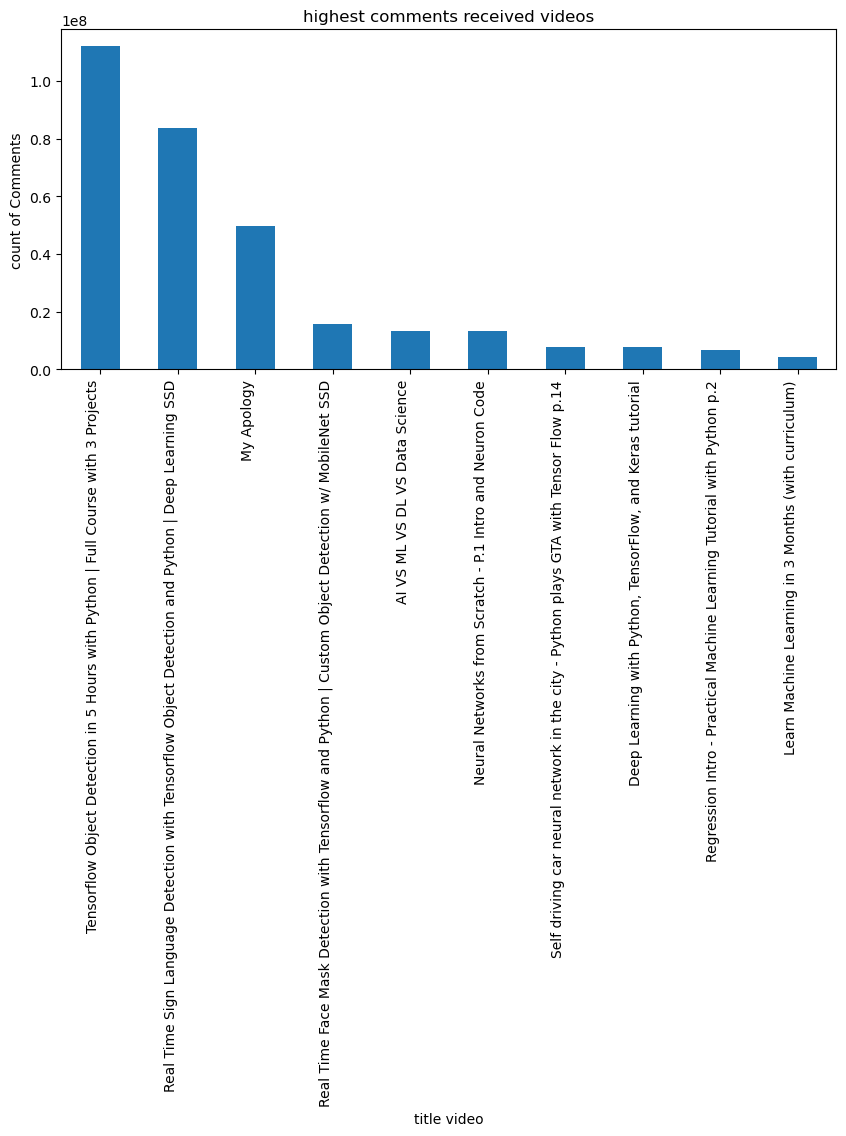

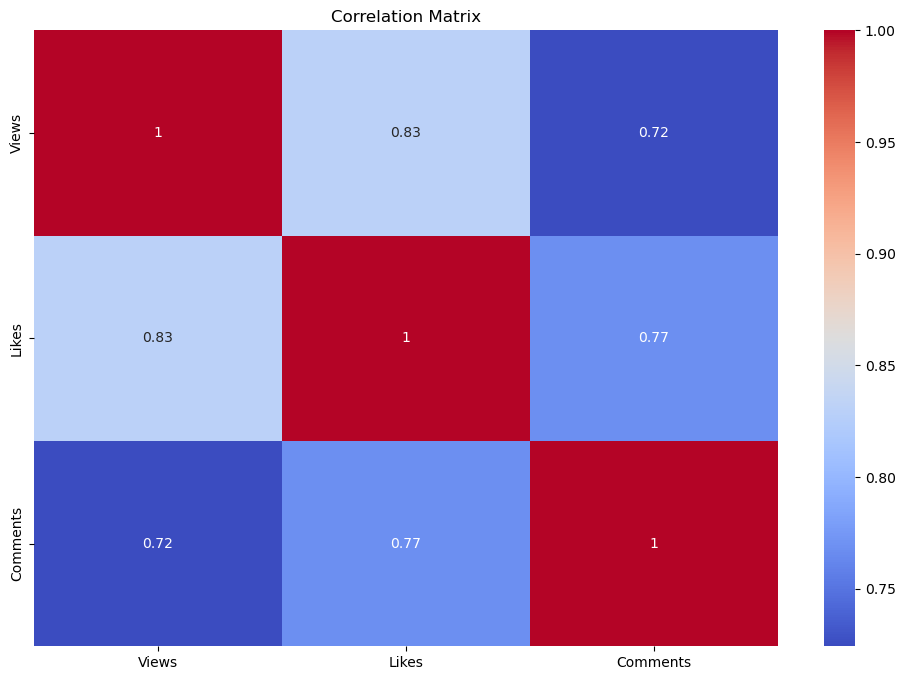

In [33]:
# Correlation analysis
numeric_data = data.select_dtypes(include=[np.number])
correlation_matrix = numeric_data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()